In [1]:
%pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.8/530.8 kB 11.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 45.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 27.8 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
# Beat tracking example
import librosa

# 1. Get the file path to an included audio example
filename = librosa.example('nutcracker')

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr, units='samples')

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timest
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

Estimated tempo: 107.67 beats per minute


/tmp/ipykernel_6477/3265285447.py:9: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),


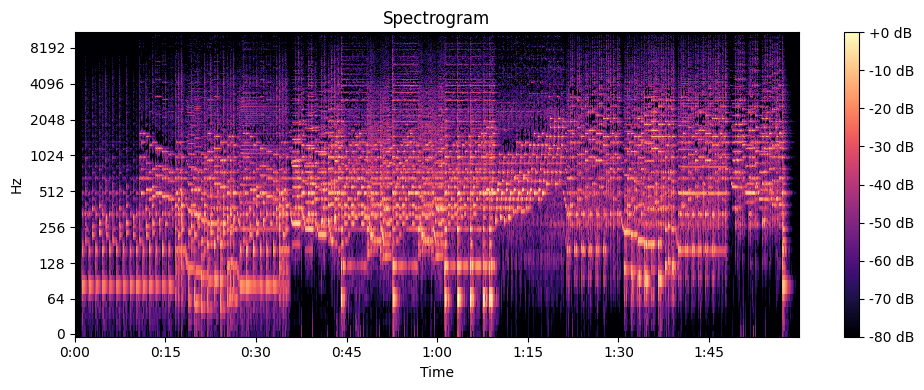

In [5]:
import numpy as np
# Create spectrogram from audio sample
spectrogram = librosa.stft(y)

# Visualize spectrogram
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),
                         y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()


# Create wave file back from spectrogram
reconstructed_audio = librosa.istft(spectrogram)

# Save the reconstructed audio as a wave file using soundfile
import soundfile as sf
sf.write('reconstructed_audio.wav', reconstructed_audio, sr)


In [33]:
print(len(y))
print(beat_frames)

2643264
[  26112   37888   51200   63488   76288   88576  101376  113152  126464
  138752  151040  163328  176128  188416  201216  212992  225280  236544
  248832  260096  271872  283648  295936  307712  319488  331264  343040
  354816  366592  378368  390144  402432  414720  425984  438272  449536
  461312  473088  484864  496640  508416  520192  531968  543744  555520
  567296  579072  591360  603136  614912  627200  639488  651776  664064
  676352  688128  700928  713216  724480  735744  747520  759296  770560
  781824  793600  805376  816640  828416  840704  852480  864768  876544
  888832  900608  912896  924672  936448  948736  960512  972800  985088
  996864 1009152 1020928 1033216 1045504 1057280 1069056 1080320 1091584
 1103360 1114624 1126400 1138176 1148928 1160192 1172480 1184256 1196032
 1207808 1219072 1230848 1242624 1254912 1266688 1278976 1291264 1303040
 1314816 1327104 1338880 1351168 1362944 1374208 1385472 1397248 1409024
 1420800 1432064 1443328 1455104 1466368 14

In [38]:
slices = list()
for idx, frame in enumerate(beat_frames):
    if idx < len(beat_frames) - 1:
        slices.append(y[frame:frame+beat_frames[idx+1]])


In [23]:


# Slice the audio file into segments corresponding to each beat
sliced_audio = [y[frame:frame+beat_frames_duration] for frame in beat_frames]

# Verify the number of slices
print(f"Number of slices: {len(sliced_audio)}")
print(beat_frames_duration)
print(sliced_audio[0] - y[0:12288])


Number of slices: 212
12288
[-1.7883989e-05 -1.2211863e-06  1.3257717e-05 ... -1.7948558e-05
 -8.3253817e-06  4.1703239e-05]


In [40]:
# Create spectrogram from audio sample
spectrogram = librosa.stft(slices[1])

# Create wave file back from spectrogram
reconstructed_audio = librosa.istft(spectrogram)

# Save the reconstructed audio as a wave file using soundfile
sf.write('reconstructed_audio_50.wav', reconstructed_audio, sr)